In [1]:
import pandas as pd
import re 
import os
import numpy as np
from tqdm.notebook import tqdm

In [2]:
import nltk
#nltk.download("words")
words = set(nltk.corpus.words.words())

<h2> Loading Data</h2>

In [5]:
data=pd.read_csv("../../Data/MarchTweets.csv")
data.drop(['Unnamed: 0'],axis=1,inplace=True)
data=data.rename(columns={"Analysis":"SS"})
data.head()

,Tweets,SS
0,RT @barleybomb: Just lost my job due to corona...,0.25833333333333336
1,RT @tourdecarlos: Did y’all president just cal...,0.0
2,RT @gherbo: WHEN I HEARD KD HAD CORONA VIRUS😔 ...,0.09375
3,RT @krystalball: If you care about the outrage...,-1.0
4,RT @manakgupta: UP police to register FIR agai...,0.0


<h2> Preparing Data for Preprocessing </h2>

In [6]:
data[data['SS']=="Tweet not Found"]=np.nan
data.dropna(axis=0,inplace=True)
data['SS']=data['SS'].astype(float)

In [7]:
data['Cleaned Tweets']=data['Tweets']
data.head()

,Tweets,SS,Cleaned Tweets
0,RT @barleybomb: Just lost my job due to corona...,0.258333,RT @barleybomb: Just lost my job due to corona...
1,RT @tourdecarlos: Did y’all president just cal...,0.000000,RT @tourdecarlos: Did y’all president just cal...
2,RT @gherbo: WHEN I HEARD KD HAD CORONA VIRUS😔 ...,0.093750,RT @gherbo: WHEN I HEARD KD HAD CORONA VIRUS😔 ...
3,RT @krystalball: If you care about the outrage...,-1.000000,RT @krystalball: If you care about the outrage...
4,RT @manakgupta: UP police to register FIR agai...,0.000000,RT @manakgupta: UP police to register FIR agai...


In [8]:
data['Cleaned Tweets'].isnull().sum()

0

<h2> Cleaning Texts </h2>

In [9]:
def clean_txt(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for i in r:
        input_txt = re.sub(i, '', input_txt)
        
    res=re.sub(r'[^\w\s]', '', input_txt.lower())
    res=re.sub('\s+',' ',res)
    res=''.join(i for i in res if not i.isdigit())
    res=' '.join([i for i in res.split() if len(i)>2])
    res = " ".join(w for w in nltk.wordpunct_tokenize(res) if w.lower() in words or not w.isalpha())
    return res

In [10]:
data['Cleaned Tweets']=np.vectorize(clean_txt)(data['Cleaned Tweets'], "RT @[\w]*")
data.head()

,Tweets,SS,Cleaned Tweets
0,RT @barleybomb: Just lost my job due to corona...,0.258333,just lost job due corona virus outbreak lookin...
1,RT @tourdecarlos: Did y’all president just cal...,0.000000,did president just call corona the virus
2,RT @gherbo: WHEN I HEARD KD HAD CORONA VIRUS😔 ...,0.093750,when had corona virus better get the bottom this
3,RT @krystalball: If you care about the outrage...,-1.000000,you care about the outrageous immorality this ...
4,RT @manakgupta: UP police to register FIR agai...,0.000000,police register fir against for risk corona


<h3> Tokenizing and Stemming </h3>

In [11]:
all_tokens=[row['Cleaned Tweets'].split() for _,row in data.iterrows() ]
from nltk.stem.porter import *
stemmer = PorterStemmer()
for i in range(len(all_tokens)):
    for j in all_tokens[i]:
        j=stemmer.stem(j)
    all_tokens[i]=' '.join(all_tokens[i])
data['Cleaned Tweets']=all_tokens
data.dropna(axis=0,inplace=True)

In [12]:
data.head()

,Tweets,SS,Cleaned Tweets
0,RT @barleybomb: Just lost my job due to corona...,0.258333,just lost job due corona virus outbreak lookin...
1,RT @tourdecarlos: Did y’all president just cal...,0.000000,did president just call corona the virus
2,RT @gherbo: WHEN I HEARD KD HAD CORONA VIRUS😔 ...,0.093750,when had corona virus better get the bottom this
3,RT @krystalball: If you care about the outrage...,-1.000000,you care about the outrageous immorality this ...
4,RT @manakgupta: UP police to register FIR agai...,0.000000,police register fir against for risk corona


<h2> Data Analysis </h2>

<h3> Assigning Sentiment as per the score </h3>

In [20]:
pos=[]
neg=[]
neu=[]
data['Sentiment']=[str(i) for i in range(data.shape[0])]
for i,row in data.iterrows():
    if(row['SS']>0):
        pos.append(row['Cleaned Tweets'])
        data.at[i,'Sentiment']="Positive"
    elif(row['SS']==0):
        neu.append(row['Cleaned Tweets'])
        data.at[i,'Sentiment']="Neutral"
    elif(row['SS']<0):
        neg.append(row['Cleaned Tweets'])
        data.at[i,'Sentiment']="Negative"

In [14]:
data.head()

,Tweets,SS,Cleaned Tweets,Sentiment
0,RT @barleybomb: Just lost my job due to corona...,0.258333,just lost job due corona virus outbreak lookin...,1
1,RT @tourdecarlos: Did y’all president just cal...,0.000000,did president just call corona the virus,0
2,RT @gherbo: WHEN I HEARD KD HAD CORONA VIRUS😔 ...,0.093750,when had corona virus better get the bottom this,1
3,RT @krystalball: If you care about the outrage...,-1.000000,you care about the outrageous immorality this ...,2
4,RT @manakgupta: UP police to register FIR agai...,0.000000,police register fir against for risk corona,0


In [21]:
pos=[i for i in pos if i]
neg=[i for i in neg if i]
neu=[i for i in neu if i]
pos[:2]

['just lost job due corona virus outbreak looking for work agriculture sector ideally farm hand similar',
 'when had corona virus better get the bottom this']

In [16]:
print(len(pos),len(neg),len(neu))

711 588 954


<h3> Countplot for Sentiment </h3>

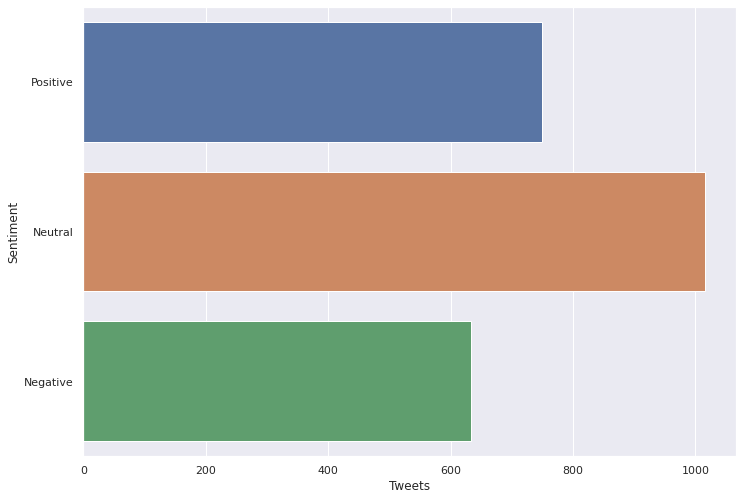

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
sns.countplot(y=data['Sentiment'])
plt.xlabel("Tweets")
plt.ylabel("Sentiment")
plt.show()

<h3> Word Cloud For all the tweets </h3>

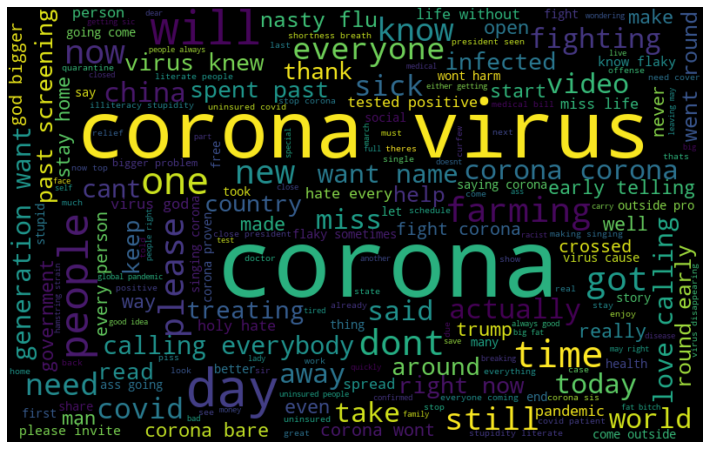

In [26]:
wcloud=' '.join([i for i in data['Cleaned Tweets']])
from wordcloud import WordCloud
import matplotlib.pyplot as plt
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(wcloud)

plt.figure(figsize=(15, 8))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

<h3> Positive WordCloud </h3>

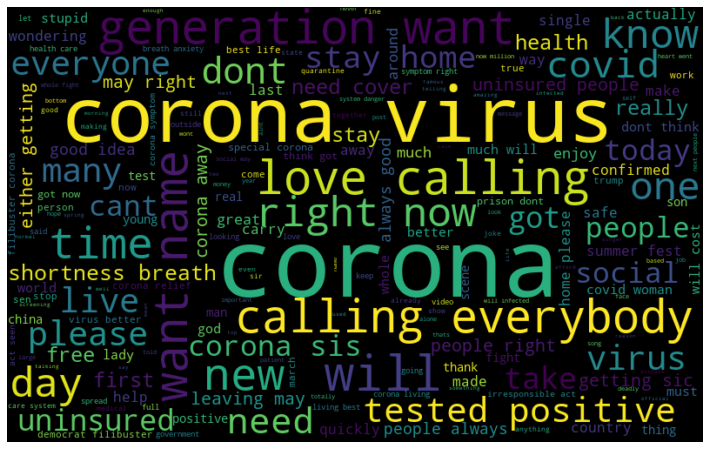

In [27]:
poscloud=' '.join([i for i in pos])
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(poscloud)

plt.figure(figsize=(15, 8))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

<h3> Negative WordCloud </h3>

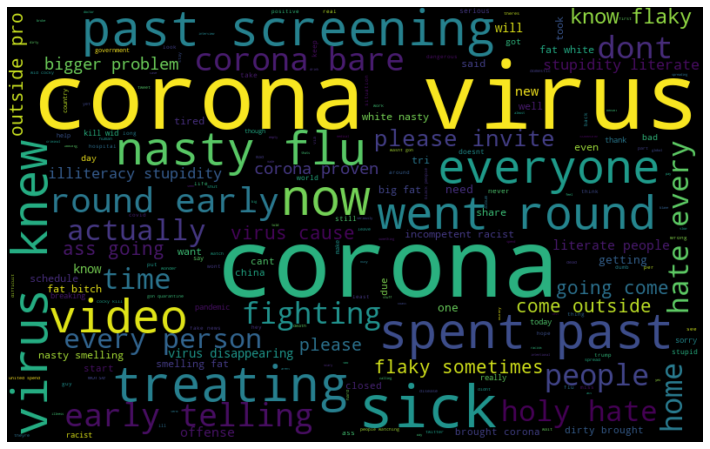

In [28]:
negcloud=' '.join([i for i in neg])
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(negcloud)

plt.figure(figsize=(15, 8))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

<h3> Neutral WordCloud </h3>

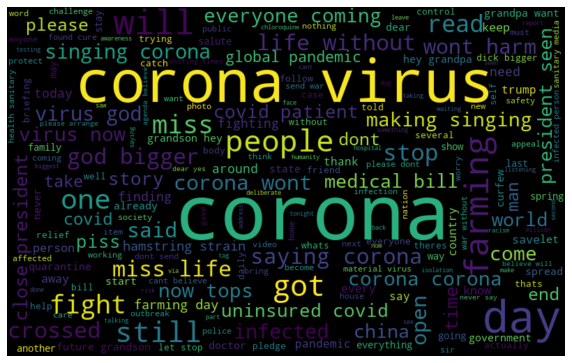

In [180]:
neucloud=' '.join([i for i in neu])
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(neucloud)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

<h2> Implementing ML model </h2>

<h3> Preparing Bag of Words Vectors and TFIDF  Vectors for Prediction </h3>

In [194]:
from sklearn.feature_extraction.text import CountVectorizer
bow_vectorizer = CountVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')
# bag-of-words feature matrix
bow = bow_vectorizer.fit_transform(data['Cleaned Tweets'])

In [191]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')
# TF-IDF feature matrix
tfidf = tfidf_vectorizer.fit_transform(data['Cleaned Tweets'])

<h3> Bag of Words </h3>

In [202]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

train_bow = bow[:31962,:]
test_bow = bow[31962:,:]

# splitting data into training and validation set
xtrain_bow, xtest_bow, y_train, y_test = train_test_split(train_bow, data['Sentiment'], random_state=42, test_size=0.3)


<h4> Decision Tree on Bag of Words </h4>

In [203]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(criterion="entropy")
clf.fit(xtrain_bow,y_train)
y_pred=clf.predict(xtest_bow)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.60      0.76      0.67       286
           1       0.69      0.57      0.63       242
           2       0.72      0.59      0.65       192

    accuracy                           0.65       720
   macro avg       0.67      0.64      0.65       720
weighted avg       0.66      0.65      0.65       720



In [223]:
import pickle
from joblib import dump
dump(clf,"DTreeBOW65.joblib")

['DTreeBOW65.joblib']

<h4> KNN on BOW </h4>

In [208]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=2)
knn.fit(xtrain_bow,y_train)
y_pred=knn.predict(xtest_bow)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.57      0.72      0.64       286
           1       0.54      0.62      0.58       242
           2       1.00      0.42      0.59       192

    accuracy                           0.61       720
   macro avg       0.70      0.59      0.60       720
weighted avg       0.67      0.61      0.61       720



In [224]:
dump(knn,"KNN61BOW.joblib")

['KNN61BOW.joblib']

<h3> TFIDF </h3>

In [216]:
train_tfidf = tfidf[:31962,:]
test_tfidf = tfidf[31962:,:]

xtrain_tfidf = train_tfidf[y_train.index-1]
xtest_tfidf = train_tfidf[y_test.index-1]

<h4> Decision Tree on TFIDF </h4>

In [219]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(criterion="gini")
clf.fit(xtrain_tfidf,y_train)
y_pred=clf.predict(xtest_tfidf)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.41      0.67      0.51       286
           1       0.40      0.25      0.31       242
           2       0.42      0.21      0.28       192

    accuracy                           0.41       720
   macro avg       0.41      0.38      0.37       720
weighted avg       0.41      0.41      0.38       720



<h4> KNN on TFIDF </h4>

In [222]:
knn=KNeighborsClassifier(n_neighbors=3)
knn.fit(xtrain_tfidf,y_train)
y_pred=clf.predict(xtest_tfidf)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.41      0.67      0.51       286
           1       0.40      0.25      0.31       242
           2       0.42      0.21      0.28       192

    accuracy                           0.41       720
   macro avg       0.41      0.38      0.37       720
weighted avg       0.41      0.41      0.38       720

